# CDC 500 Cities Data:
More info: https://www.cdc.gov/places/measure-definitions/unhealthy-behaviors/index.html

More data: https://data.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq

### Unhealthy Behaviors:
- Binge driking (Alice): https://data.cdc.gov/resource/gqat-rcqz.json
- Current smoking
- No leisure-time physical activity (Esther): https://data.cdc.gov/resource/axqz-rkkp.json
- Sleeping less than 7 hours (Kent): https://data.cdc.gov/resource/eqbn-8mpz.json
### Health Outcomes:
- Arthritis
- Asthma
- High Blood Pressure
- Cancer
- High cholesterol
- Chronic kidney disease
- Chronic obstructive pulmonary disease
- Coronary heath disease
- Depression: https://data.cdc.gov/resource/i2ek-k3pa.json
- Diagnosed diabetes
- Obesity
- All teeth lost among adults aged >= 65
- Stroke
### Use of preventitive services:
- Current lack of health insurance
- Visits to doctor for routine checkup within the past year
- Visits to dentist or dental clinic
- Taking medicine for high blood pressure control
- Cholesterol screening
- Mammography use among women aged 50-74 years
- Cervical cancer screening among adult women aged 21–65 years
- Colorectal cancer screening among adults aged 50–75 years
- Older adults aged ≥65 years who are up to date on a core set of clinical preventive services by sex


In [27]:
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
mental_base_url = "https://data.cdc.gov/resource/i2ek-k3pa.json?"
params = {
    "GeographicLevel" : "City",
    "DataValueTypeID" : "AgeAdjPrv"
}
mental_data = requests.get(mental_base_url, params = params).json()
pprint(mental_data)

[{'category': 'Health Outcomes',
  'categoryid': 'HLTHOUT',
  'cityfips': '0150000',
  'cityname': 'Mobile',
  'data_value': '16.3',
  'data_value_type': 'Age-adjusted prevalence',
  'data_value_unit': '%',
  'datasource': 'BRFSS',
  'datavaluetypeid': 'AgeAdjPrv',
  'geographiclevel': 'City',
  'geolocation': {'human_address': '{"address": "", "city": "", "state": "", '
                                   '"zip": ""}',
                  'latitude': '30.6776248648',
                  'longitude': '-88.1184482714',
                  'needs_recoding': False},
  'high_confidence_limit': '16.5',
  'low_confidence_limit': '16.2',
  'measure': 'Mental health not good for >=14 days among adults aged >=18 '
             'Years',
  'measureid': 'MHLTH',
  'populationcount': '195111',
  'short_question_text': 'Mental Health',
  'stateabbr': 'AL',
  'statedesc': 'Alabama',
  'uniqueid': '0150000',
  'year': '2017'},
 {'category': 'Health Outcomes',
  'categoryid': 'HLTHOUT',
  'cityfips': '0427400

In [3]:
# Create the dataframe
mental_df = pd.DataFrame()
mental_df['City Name'] = ""
mental_df['State'] = ""
mental_df['Lat'] = ""
mental_df['Lon'] = ""
mental_df['% Depress'] = ""

mental_df

,City Name,State,Lat,Lon,% Depress


In [16]:
# Add values to dataframe

for x in range(len(mental_data)):
    mental_df.loc[x,'City Name'] = mental_data[x]['cityname']
    mental_df.loc[x,'Lat'] = mental_data[x]['geolocation']['latitude']
    mental_df.loc[x,'Lon'] = mental_data[x]['geolocation']['longitude']
    mental_df.loc[x, '% Depress'] = mental_data[x]['data_value']
    mental_df.loc[x, 'State'] = mental_data[x]['stateabbr']

mental_df.head()
    

,City Name,State,Lat,Lon,% Depress
0,Mobile,AL,30.6776248648,-88.1184482714,16.3
1,Gilbert,AZ,33.310149392,-111.746237467,10.9
2,Avondale,AZ,33.3858367405,-112.323626619,13.5
3,Montgomery,AL,32.3472645333,-86.2677059552,15.8
4,Anchorage,AK,61.149868731,-149.111113424,11.0


In [5]:
# Binge drinking data

drinking_base_url = "https://data.cdc.gov/resource/gqat-rcqz.json?"
params = {
    "GeographicLevel" : "City",
    "DataValueTypeID" : "AgeAdjPrv"
}
drinking_data = requests.get(drinking_base_url, params = params).json()
pprint(drinking_data)

[{'category': 'Unhealthy Behaviors',
  'categoryid': 'UNHBEH',
  'cityfips': '0636448',
  'cityname': 'Indio',
  'data_value': '17.7',
  'data_value_type': 'Age-adjusted prevalence',
  'data_value_unit': '%',
  'datasource': 'BRFSS',
  'datavaluetypeid': 'AgeAdjPrv',
  'geographiclevel': 'City',
  'geolocation': {'human_address': '{"address": "", "city": "", "state": "", '
                                   '"zip": ""}',
                  'latitude': '33.7298067837',
                  'longitude': '-116.237258141',
                  'needs_recoding': False},
  'high_confidence_limit': '17.9',
  'low_confidence_limit': '17.5',
  'measure': 'Binge drinking among adults aged >=18 Years',
  'measureid': 'BINGE',
  'populationcount': '76036',
  'short_question_text': 'Binge Drinking',
  'stateabbr': 'CA',
  'statedesc': 'California',
  'uniqueid': '0636448',
  'year': '2017'},
 {'category': 'Unhealthy Behaviors',
  'categoryid': 'UNHBEH',
  'cityfips': '0628000',
  'cityname': 'Fullerton',


In [6]:
# Create the dataframe
drinking_df = pd.DataFrame()
drinking_df['City Name'] = ""
drinking_df['% Binge Drinking'] = ""


In [9]:
for x in range(len(drinking_data)):
    drinking_df.loc[x,'City Name'] = drinking_data[x]['cityname']
    drinking_df.loc[x, '% Binge Drinking'] = drinking_data[x]['data_value']

drinking_df.head()

,City Name,% Binge Drinking
0,Indio,17.7
1,Fullerton,18.4
2,Sunrise,16.6
3,Tracy,20.0
4,Louisville,18.6


In [10]:
depress_drinking_df = pd.merge(mental_df, drinking_df, on='City Name')
depress_drinking_df.head()

,City Name,State,Lat,Lon,% Depress,% Binge Drinking
0,Mobile,AL,30.6776248648,-88.1184482714,16.3,13.9
1,Gilbert,AZ,33.310149392,-111.746237467,10.9,19.0
2,Avondale,AZ,33.3858367405,-112.323626619,13.5,16.2
3,Montgomery,AL,32.3472645333,-86.2677059552,15.8,13.0
4,Anchorage,AK,61.149868731,-149.111113424,11.0,19.0


In [22]:
depress_drinking_df['% Depress'] = depress_drinking_df['% Depress'].astype("float")
depress_drinking_df['% Binge Drinking'] = depress_drinking_df['% Binge Drinking'].astype("float")
depress_drinking_df.dtypes

City Name            object
State                object
Lat                  object
Lon                  object
% Depress           float64
% Binge Drinking    float64
dtype: object

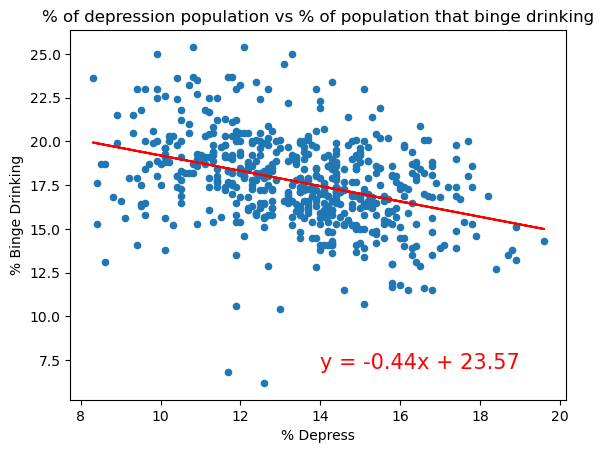

The r-value is: -0.3683445074767244


In [29]:

x_values = depress_drinking_df['% Depress']
y_values = depress_drinking_df['% Binge Drinking']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
depress_drinking_df.plot(kind='scatter', x='% Depress', y='% Binge Drinking', title="% of depression population vs % of population that binge drinking")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,7),fontsize=15,color="red")
plt.show()
print(f"The r-value is: {rvalue}")

There is a weak correlation between depression and binge drinking

In [31]:
# Top depressing city
top_cities = depress_drinking_df.sort_values('% Depress', ascending=False)
top_cities.head(5)

,City Name,State,Lat,Lon,% Depress,% Binge Drinking
349,Flint,MI,43.0236339386,-83.6920640313,19.6,14.3
462,Reading,PA,40.3399678686,-75.9266128837,18.9,15.1
392,Camden,NJ,39.9361910066,-75.1072961899,18.9,13.2
431,Youngstown,OH,41.0993286607,-80.6463187081,18.8,13.8
341,Detroit,MI,42.3847015631,-83.1053178776,18.7,13.5


In [32]:
# Least depressing city
least_cities = depress_drinking_df.sort_values('% Depress')
least_cities.head(5)

,City Name,State,Lat,Lon,% Depress,% Binge Drinking
373,Plymouth,MN,45.022462874,-93.4616016242,8.3,23.6
142,Sunnyvale,CA,37.3834416566,-122.025624324,8.4,15.3
67,Fremont,CA,37.5278685405,-121.984121512,8.4,17.6
248,Johns Creek,GA,34.0332991998,-84.2027195506,8.5,18.7
138,San Ramon,CA,37.7623705462,-121.938150371,8.6,18.7
